In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import math
from neurodynex. tools import input_factory


WARNING    D:\Programas\Miniconda2\envs\bmnn\lib\site-packages\ipykernel_launcher.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
 [py.warnings]
WARNING    D:\Programas\Miniconda2\envs\bmnn\lib\site-packages\brian2\units\fundamentalunits.py:1308: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return Quantity(np.ndarray.__getitem__(self, key), self.dim)
 [py.warnings]


Missing compiler_cxx fix for MSVCCompiler


WARNING    Cannot use weave, a test compilation failed: error: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (CompileError) [brian2.codegen.runtime.weave_rt.weave_rt.failed_compile_test]
WARNING    D:\Programas\Miniconda2\envs\bmnn\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Renan\.cython\brian_extensions\_cython_magic_27b00bb86644851871cb5598a1fc7683.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manua

nr of spikes: 10000


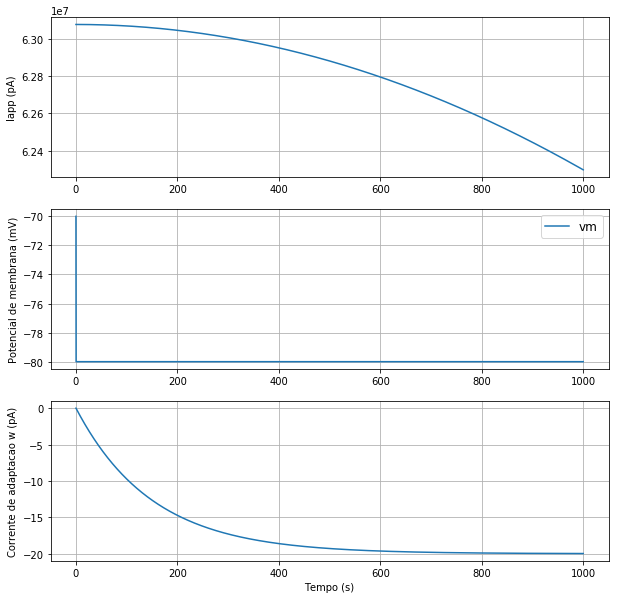

The Coefficient of Variation (CV) is in percetange of: 2.64331761219e-11


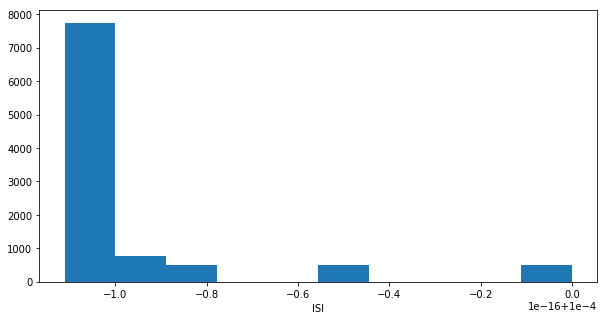

In [2]:
v_rest= -70*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 0*b2.nA

tau_w = 150*b2.ms
v_max = 20*b2.mV

simulation_time = 1000
dt =  0.01*b2.ms 

#current = 200.01 * b2.pamp
current = 500*b2.pA
# input_current = input_factory.get_step_current(
# t_start=500, t_end=1000, unit_time=b2.ms,
# amplitude=current*b2.pA) 

append_zero=True
t_start=0
t_end=simulation_time
sigma = 20*(b2.pA*(b2.second**0.5))
dt_cur = 0.01
sigma = sigma/(dt**0.5)
mi=0
unit_time=b2.ms

tmp_size = 1 + t_end  # +1 for t=0
if append_zero:
    tmp_size += 1
tmp = np.zeros((tmp_size/dt_cur, 1)) * b2.pA

x = np.linspace(0, t_end+1, tmp_size/dt_cur) * b2.pA
normal = np.asarray(((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2))))
normal = normal*b2.pA  + 0.1*b2.nA
tmp[t_start: tmp_size/dt_cur + 1, 0] = normal

input_current = b2.TimedArray(tmp, dt=dt)
    
# differential equation of Leaky Integrate-and-Fire model
eqs = """

dv/dt = (conductance_L/membrane_capacitance)*
        (v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a*(v-v_rest)-w)/tau_w :  amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b",
                        threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

print("nr of spikes: {}".format(spike_monitor.count[0]))
#print("spikes times: {}".format(spike_monitor.t[:]))

#plot
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,1,1)
c = input_current(state_monitor.t, 0)
plt.plot(state_monitor.t/b2.ms, c/b2.pA )
plt.ylabel('Iapp (pA)')
plt.grid()

fig.add_subplot(3,1,2)
plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)

plt.ylabel('Potencial de membrana (mV)')
plt.grid()
plt.legend(["vm", "firing threshold"], fontsize=12)

fig.add_subplot(3,1,3)
plt.plot(state_monitor.t/b2.ms, state_monitor.w[0]/b2.pA)
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente de adaptacao w (pA)')

plt.show()

vector = list()
spikes = spike_monitor.count[:]
inter = np.full(len(spikes[:]), np.nan)
for idx in range(len(spikes)):
    for k in range(len(spike_monitor.t)-1):
        inter[idx] = (float(spike_monitor.spike_trains()[idx][k+1]) - float(spike_monitor.spike_trains()[idx][k]));
        vector.append(inter[idx])
        
fig = plt.figure(figsize=(10, 5))
plt.hist(vector, 10)
plt.xlabel('ISI')


isi_mu = np.mean(vector)
isi_std = np.std(vector)
CV = isi_std*100/isi_mu
print("The Coefficient of Variation (CV) is in percetange of: %s" % CV)


# state_monitor.t[0:100]/b2.ms, state_monitor.v[0][0:100]/b2.mV

    

WARNING    __main__:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
 [py.warnings]


nr of spikes: 10000


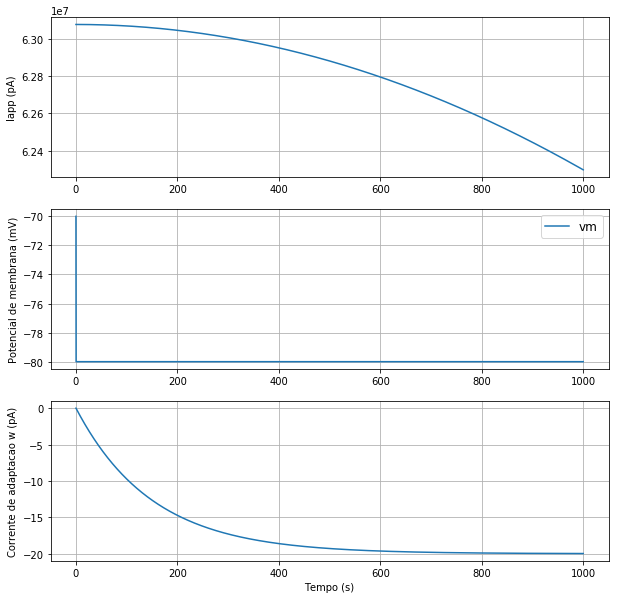

The Coefficient of Variation (CV) is in percetange of: 2.64331761219e-11


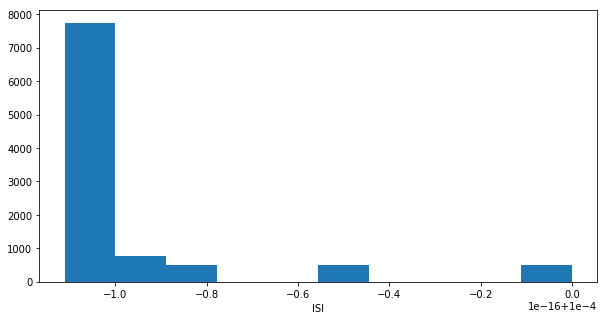

In [3]:
v_rest= -70*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 0*b2.nA

tau_w = 150*b2.ms
v_max = 20*b2.mV

simulation_time = 1000
dt =  0.01*b2.ms 

#current = 200.01 * b2.pamp
current = 500*b2.pA
# input_current = input_factory.get_step_current(
# t_start=500, t_end=1000, unit_time=b2.ms,
# amplitude=current*b2.pA) 

append_zero=True
t_start=0
t_end=simulation_time
sigma = 20*(b2.pA*(b2.second**0.5))
dt_cur = 0.01
sigma = sigma/(dt**0.5)
mi=0
unit_time=b2.ms

tmp_size = 1 + t_end  # +1 for t=0
if append_zero:
    tmp_size += 1
tmp = np.zeros((tmp_size/dt_cur, 1)) * b2.pA

x = np.linspace(0, t_end+1, tmp_size/dt_cur) * b2.pA
normal = np.asarray(((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2))))
normal = normal*b2.pA  + 0.2*b2.nA
tmp[t_start: tmp_size/dt_cur + 1, 0] = normal

input_current = b2.TimedArray(tmp, dt=dt)
    
# differential equation of Leaky Integrate-and-Fire model
eqs = """

dv/dt = (conductance_L/membrane_capacitance)*
        (v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a*(v-v_rest)-w)/tau_w :  amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b",
                        threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

print("nr of spikes: {}".format(spike_monitor.count[0]))
#print("spikes times: {}".format(spike_monitor.t[:]))

#plot
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,1,1)
c = input_current(state_monitor.t, 0)
plt.plot(state_monitor.t/b2.ms, c/b2.pA )
plt.ylabel('Iapp (pA)')
plt.grid()

fig.add_subplot(3,1,2)
plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)

plt.ylabel('Potencial de membrana (mV)')
plt.grid()
plt.legend(["vm", "firing threshold"], fontsize=12)

fig.add_subplot(3,1,3)
plt.plot(state_monitor.t/b2.ms, state_monitor.w[0]/b2.pA)
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente de adaptacao w (pA)')

plt.show()

vector = list()
spikes = spike_monitor.count[:]
inter = np.full(len(spikes[:]), np.nan)
for idx in range(len(spikes)):
    for k in range(len(spike_monitor.t)-1):
        inter[idx] = (float(spike_monitor.spike_trains()[idx][k+1]) - float(spike_monitor.spike_trains()[idx][k]));
        vector.append(inter[idx])
        
fig = plt.figure(figsize=(10, 5))
plt.hist(vector, 10)
plt.xlabel('ISI')


isi_mu = np.mean(vector)
isi_std = np.std(vector)
CV = isi_std*100/isi_mu
print("The Coefficient of Variation (CV) is in percetange of: %s" % CV)